In [119]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
from random import sample

In [3]:
df = pd.read_csv('AB_test_data.csv')

In [4]:
df

,Variant,purchase_TF,date,id
0,A,False,2019-12-26,0x6f9421
1,A,False,2019-08-16,0x59d442
2,A,True,2019-03-18,0x6db8f8
3,A,False,2019-02-13,0x68245d
4,A,False,2019-09-28,0x28566e
...,...,...,...,...
54995,A,False,2019-06-19,0x451451
54996,A,False,2019-03-22,0x871d51
54997,A,False,2019-02-10,0x50d163
54998,B,False,2020-01-09,0x3544c4


In [5]:
df['Variant'].value_counts()

A    50000
B     5000
Name: Variant, dtype: int64

In [6]:
df_pop = df.loc[df['Variant'] == 'A']
df_sample = df.loc[df['Variant'] == 'B']

In [7]:
df_pop['purchase_TF'].value_counts()

False    42397
True      7603
Name: purchase_TF, dtype: int64

In [8]:
# Setting up null hypo

pop_t = df_pop['purchase_TF'].value_counts()[1]
pop_f = df_pop['purchase_TF'].value_counts()[0]

pop_port = pop_t/df_pop.shape[0]

In [9]:
pop_port

0.15206

In [10]:
df_sample['purchase_TF'].value_counts()

False    4019
True      981
Name: purchase_TF, dtype: int64

In [11]:
samp_t = df_sample['purchase_TF'].value_counts()[1]
samp_f = df_sample['purchase_TF'].value_counts()[0]

In [12]:
# Calculate p value

stats.binom_test((samp_t, samp_f), p=pop_port, alternative='two-sided')

5.04855132322832e-17

#### Manual Calculation for Z

In [13]:
# Sample p
981/5000

0.1962

In [14]:
# population p
7603/50000

0.15206

#### If Variant A and B are two samples

In [15]:
# p*

((50000 * 0.15206) + (5000 * 0.1962))/(50000 + 5000)

0.15607272727272728

In [16]:
(0.1962 - 0.15206)/math.sqrt((0.15607272727272728 * (1-0.15607272727272728))/(50000+5000))

28.523160969366018

In [17]:
(1 - stats.norm(0,1).cdf(28.523160969366018))*2

0.0

#### If Variant A  is population and B is the sample

In [18]:
(0.1962 - 0.15206)/math.sqrt((0.15206 * (1-0.15206))/(50000))

27.48699582798793

In [19]:
(1 - stats.norm(0,1).cdf(27.48699582798793))*2

0.0

#### Check if Time matters

In [20]:
df.groupby(['date','Variant','purchase_TF']).count()

id
date       Variant purchase_TF     
2019-01-01 A       False        114
                   True          21
2019-01-02 A       False         90
                   True          24
2019-01-03 A       False        102
...                             ...
2020-01-29 B       True          41
2020-01-30 A       False        119
                   True          18
           B       False        138
                   True          34

[850 rows x 1 columns]

In [21]:
df.dtypes

Variant        object
purchase_TF      bool
date           object
id             object
dtype: object

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df_date_count = df.loc[df['date'] >= '2020-01-01'].groupby(['date','Variant','purchase_TF']).count().reset_index()

In [24]:
df_date_count

,date,Variant,purchase_TF,id
0,2020-01-01,A,False,108
1,2020-01-01,A,True,12
2,2020-01-01,B,False,127
3,2020-01-01,B,True,33
4,2020-01-02,A,False,118
...,...,...,...,...
115,2020-01-29,B,True,41
116,2020-01-30,A,False,119
117,2020-01-30,A,True,18
118,2020-01-30,B,False,138


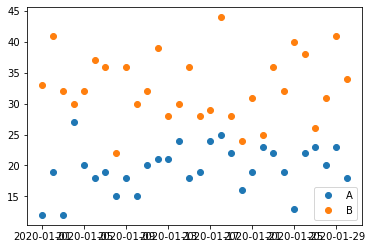

In [26]:
groups = df_date_count[df_date_count['purchase_TF'] == True].groupby("Variant")
for name, group in groups:
    plt.plot(group["date"], group["id"], marker="o", linestyle="", label=name)
plt.legend()


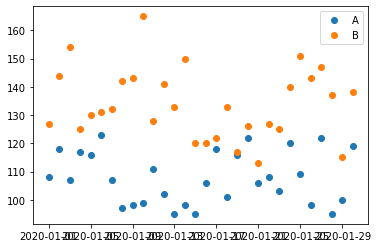

In [27]:
groups = df_date_count[df_date_count['purchase_TF'] == False].groupby("Variant")
for name, group in groups:
    plt.plot(group["date"], group["id"], marker="o", linestyle="", label=name)
plt.legend()


#### Did not find a clear seasonality behaviour

### Question 1. A/B Test

In [28]:
df_date_count

,date,Variant,purchase_TF,id
0,2020-01-01,A,False,108
1,2020-01-01,A,True,12
2,2020-01-01,B,False,127
3,2020-01-01,B,True,33
4,2020-01-02,A,False,118
...,...,...,...,...
115,2020-01-29,B,True,41
116,2020-01-30,A,False,119
117,2020-01-30,A,True,18
118,2020-01-30,B,False,138


In [31]:
df[df['date'] == '2019-01-01'].groupby(['date','Variant','purchase_TF']).count()

id
date       Variant purchase_TF     
2019-01-01 A       False        114
                   True          21

#### Should we use booking per day as hypothesis? or conversion rate per day?  or overall conversion rate? 

In [40]:
df.loc[(df['Variant'] == 'A') & (df['date'] >= '2020-01-01')]['purchase_TF'].shape[0]

3821

In [36]:
df.loc[(df['Variant'] == 'A') & (df['date'] >= '2020-01-01')]['purchase_TF'].value_counts()

False    3234
True      587
Name: purchase_TF, dtype: int64

In [38]:
df.loc[(df['Variant'] == 'A') & (df['date'] >= '2020-01-01')]['purchase_TF'].value_counts()[1]/df.loc[(df['Variant'] == 'A') & (df['date'] >= '2020-01-01')]['purchase_TF'].shape[0]

0.15362470557445695

In [39]:
df.loc[(df['Variant'] == 'B') & (df['date'] >= '2020-01-01')]['purchase_TF'].value_counts()[1]/df.loc[(df['Variant'] == 'B') & (df['date'] >= '2020-01-01')]['purchase_TF'].shape[0]

0.1962

In [41]:
((3821 * 0.15362470557445695) + (5000 * 0.1962))/(3821 + 5000)

0.17775762385217095

In [42]:
(0.1962 - 0.15362470557445695)/math.sqrt((0.17775762385217095 * (1-0.17775762385217095))/(3821+5000))

10.459297719441443

In [43]:
(1 - stats.norm(0,1).cdf(10.459297719441443))*2

0.0

In [136]:
def hypo_test(df0, df1):
    n0 = df0.shape[0]
    n1 = df1.shape[0]
    
    p0 = df0['purchase_TF'].value_counts()[1]/n0
    p1 = df1['purchase_TF'].value_counts()[1]/n1
    
    p_bar = (p0 * n0 + p1 * n1)/(n0 + n1)
    
    z = (p1 - p0)/math.sqrt((p_bar * (1 - p_bar))/(n0 + n1))
    
    print('z score is ' + str(z))
    result = (1 - stats.norm(0,1).cdf(z))*2
    
    return result

### Question 2. Optimal Sample Size

In [99]:
stats.norm(0,1).ppf(0.8)

0.8416212335729143

In [111]:
# Assume variant A and B are two samples
# Reference:
# https://www.itl.nist.gov/div898/handbook/prc/section2/prc242.htm


def optimal_sample_size(alpha, p0, p1, beta):
    p_bar = p0 + p1
    
    delta = p1 - p0
    
    t_type1 = stats.norm(0,1).ppf(alpha/2) * -1 # multiply -1?
    t_type2 = stats.norm(0,1).ppf(beta)
    
    result = ((t_type1 * ((2 * p_bar * (1 - p_bar)) ** 0.5)) + (t_type2 * ((p0 * (1 - p0) + p1 * (1 - p1)) ** 0.5)))** 2
    
    if delta != 0:
        result = result / (delta**2)
    
    return result

In [112]:
optimal_sample_size(0.05, 0.15362470557445695, 0.1962, 0.8)

1734.9248777613896

In [121]:
def sample_simulation(n, df):
    '''
    return ==> a dataframe with sample drawed
    '''
    df_a = df[df['Variant'] == 'A']
    df_b = df[df['Variant'] == 'B']
    
    max_a = df_a.shape[0]
    max_b = df_b.shape[0]
    
    pick_a = list(sample(range(0, max_a),round(n)))
    pick_b = list(sample(range(0, max_b),round(n)))
    
    df_a_picked = df_a.iloc[pick_a]
    df_b_picked = df_b.iloc[pick_b]
    
    result = df_a_picked.append(df_b_picked, ignore_index = True)
    
    return result

In [123]:
sample_simulation(1734.9248777613896, df[df['date'] >= '2020-01-01'])

,Variant,purchase_TF,date,id
0,A,False,2020-01-02,0x3e8430
1,A,False,2020-01-10,0x46d856
2,A,False,2020-01-30,0x726889
3,A,False,2020-01-11,0x8f7d5b
4,A,True,2020-01-23,0x6af2de
...,...,...,...,...
3465,B,True,2020-01-13,0x280ae6
3466,B,False,2020-01-27,0x14fb38
3467,B,True,2020-01-08,0x934c02
3468,B,False,2020-01-24,0x85605c


In [124]:
test_1 = sample_simulation(1734.9248777613896, df[df['date'] >= '2020-01-01'])

In [129]:
hypo_test(test_1[test_1['Variant'] == 'A'], test_1[test_1['Variant'] == 'B'])

8.813422099612417


0.0

In [140]:
for i in range(10):
    test = sample_simulation(1734.9248777613896, df[df['date'] >= '2020-01-01'])
    
    print(hypo_test(test[test['Variant'] == 'A'], test[test['Variant'] == 'B']))

z score is 5.7233708617758206
1.0443095499468313e-08
z score is 7.622886126849425
2.4868995751603507e-14
z score is 5.386782119483528
7.173030036611294e-08
z score is 7.953442680425239
1.7763568394002505e-15
z score is 8.070346698413834
6.661338147750939e-16
z score is 6.611137980242982
3.81377152081086e-11
z score is 6.121207955236667
9.286860169765987e-10
z score is 7.51927384765909
5.5067062021407764e-14
z score is 6.304630141235011
2.8888291758732976e-10
z score is 5.750032942327542
8.9226062094383e-09


### Question 3. Sequential Test

In [174]:
def SPRT(p0, p1, alpha, power, df):
    log_a = math.log(1/(alpha/2))
    log_b = math.log(1 - power)
    
    result = 0
    
    count = 0
    
    ran = df.shape[0]
    
    sam = list(sample(range(0, ran),ran))
    
    for index, row in df.iloc[sam].iterrows():
        if row['purchase_TF'] == True:
            result = result + math.log(p1/p0)
        else:
            result = result + math.log((1 - p1)/(1 - p0))
        count += 1
        
        if (result >= log_a) or (result <= log_b):
            break
    
    
    if result >= log_a:
        print('alternative is true')
    if result <= log_b:
        print('null hypo is true')
        
    if count == ran:
        print('no solution reached')
        
    return count

In [169]:
SPRT(0.15362470557445695, 0.1962, 0.05, 0.8, df.loc[(df['Variant'] == 'B') & (df['date'] >= '2020-01-01')])

alternative is true


881

In [178]:
for i in range(30):
    print(SPRT(0.15362470557445695, 0.2, 0.05, 0.8, df.loc[(df['Variant'] == 'B') & (df['date'] >= '2020-01-01')]))

alternative is true
135
alternative is true
234
null hypo is true
52
alternative is true
223
alternative is true
633
null hypo is true
57
alternative is true
513
alternative is true
241
alternative is true
240
alternative is true
167
alternative is true
97
null hypo is true
137
alternative is true
119
alternative is true
615
null hypo is true
109
null hypo is true
148
alternative is true
406
alternative is true
785
alternative is true
371
alternative is true
155
null hypo is true
63
null hypo is true
160
alternative is true
439
alternative is true
483
alternative is true
91
alternative is true
389
alternative is true
263
null hypo is true
86
alternative is true
82
alternative is true
683
